In [1]:
%reload_kedro

2023-03-04 15:39:31,037 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /Users/guilhermepalazzo/Desktop/dev/git_repositories/crypto_msc_thesis
2023-03-04 15:39:31,322 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-03-04 15:39:31,490 - kedro.extras.extensions.ipython - INFO - ** Kedro project crypto_thesis
2023-03-04 15:39:31,491 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [2]:
from crypto_thesis.utils import build_log_return
import matplotlib.pyplot as plt

In [3]:
target_name = catalog.load("params:spine_preprocessing.target_name")
df_prm = catalog.load("prm_binance")

2023-03-04 15:39:32,385 - kedro.io.data_catalog - INFO - Loading data from `params:spine_preprocessing.target_name` (MemoryDataSet)...
2023-03-04 15:39:32,389 - kedro.io.data_catalog - INFO - Loading data from `prm_binance` (ParquetDataSet)...


### Remarks on time series modeling

In [5]:
df_prm_filtered = df_prm[df_prm["symbol"] == target_name]
assert df_prm_filtered["symbol"].nunique() == 1, "More than 1 target selected, review."
df_prm_filtered = df_prm_filtered[["open_time", "close"]]

df_prm_filtered_logret = build_log_return(df=df_prm_filtered)
df_prm_filtered_logret.loc[:, "log_return_shift"] = df_prm_filtered_logret["log_return"].shift()

df_prm_filtered_dropped = df_prm_filtered_logret.dropna() #remove first 2 data points
assert df_prm_filtered_dropped.shape[0] == df_prm_filtered_logret.shape[0] - 2

In [6]:
df_px = df_prm_filtered_dropped.set_index("open_time").sort_index()[["close", "shift"]]
df_logret = df_prm_filtered_dropped.set_index("open_time").sort_index()[["log_return", "log_return_shift"]]

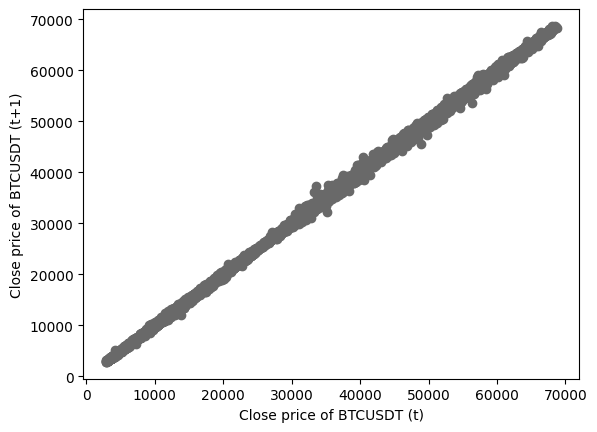

In [7]:
plt.scatter(df_px["shift"], df_px["close"], c="dimgrey")
plt.xlabel(f"Close price of {target_name} (t)")
plt.ylabel(f"Close price of {target_name} (t+1)")
plt.savefig("/Users/guilhermepalazzo/Desktop/fig_closePx_target_scatter_t_t1.png")

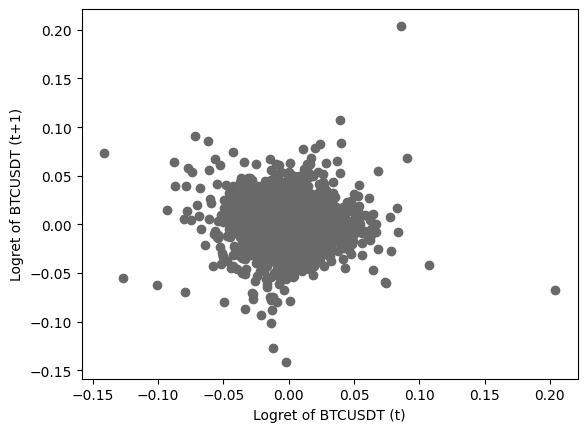

In [8]:
plt.scatter(df_logret["log_return_shift"], df_logret["log_return"], c="dimgrey")
plt.xlabel(f"Logret of {target_name} (t)")
plt.ylabel(f"Logret of {target_name} (t+1)")
plt.savefig("/Users/guilhermepalazzo/Desktop/fig_logret_target_scatter_t_t1.png")